In [ ]:
# Análisis Exploratorio de Datos (EDA)
Este notebook contiene un análisis exploratorio de un dataset de productos del sitio MercadoLibre.

In [ ]:
## 1. Carga de librerías y datos

In [69]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
### Exploración inicial del dataset
Mostramos las columnas, forma y tipo de datos para entender la estructura.

In [35]:
df = pd.read_json('C:/Users/Acer/OneDrive/Escritorio/ejercicio_ML/datos/MLA_100k.jsonlines', lines=True)
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [37]:
df.columns


Index(['seller_address', 'warranty', 'sub_status', 'condition',
       'seller_contact', 'deal_ids', 'base_price', 'shipping',
       'non_mercado_pago_payment_methods', 'seller_id', 'variations',
       'location', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'geolocation', 'sold_quantity', 'available_quantity'],
      dtype='object')

In [ ]:
## 2. Calidad de los datos
Revisamos duplicados y valores nulos para evaluar la calidad de los datos.

In [38]:
df.shape

(100000, 48)

In [39]:
df.dtypes


seller_address                                   object
warranty                                         object
sub_status                                       object
condition                                        object
seller_contact                                   object
deal_ids                                         object
base_price                                      float64
shipping                                         object
non_mercado_pago_payment_methods                 object
seller_id                                         int64
variations                                       object
location                                         object
site_id                                          object
listing_type_id                                  object
price                                           float64
attributes                                       object
buying_mode                                      object
tags                                            

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

In [ ]:
### Limpieza de texto
Convertimos los datos a texto plano para comparaciones y limpieza.

Convertir a formato datetime:

In [41]:
df['date_created'] = pd.to_datetime(df['date_created'])
df['start_time'] = pd.to_datetime(df['start_time'])
df['stop_time'] = pd.to_datetime(df['stop_time'])
df['last_updated'] = pd.to_datetime(df['last_updated'])


Unificar formatos (mayúsculas, espacios, etc.) en texto:


In [42]:
df['condition'] = df['condition'].str.lower().str.strip()


In [45]:
# Convertir todos los valores a string para evitar problemas con tipos no hasheables
df_string = df.astype(str)

# Detectamos duplicados exactos por fila completa
duplicates = df_string[df_string.duplicated(keep=False)]

# Mostrar duplicados completos
print(f'Duplicados encontrados (línea completa): {len(duplicates)}')
display(duplicates)


Duplicados encontrados (línea completa): 0


,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity


In [47]:
# Función para limpiar caracteres no válidos (como "$", por ejemplo)
def clean_text(text):
    if isinstance(text, str):
        return re.sub(r'[^\w\s]', '', text)  # Eliminamos caracteres especiales
    return text

In [10]:
print("Nulos:", df.isnull().sum())

Nulos: seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last

In [18]:
df.describe()

,base_price,seller_id,price,official_store_id,differential_pricing,original_price,catalog_product_id,subtitle,initial_quantity,sold_quantity,available_quantity
count,1.000000e+05,1.000000e+05,1.000000e+05,818.000000,0.0,143.000000,1.100000e+01,0.0,100000.000000,100000.000000,100000.000000
mean,5.252423e+04,8.425269e+07,5.252433e+04,206.443765,NaN,1593.341958,3.727643e+06,NaN,35.093370,2.396990,34.842380
std,8.623127e+06,5.497257e+07,8.623127e+06,128.252953,NaN,2245.798072,1.884698e+06,NaN,421.076196,42.685077,420.808403
min,8.400000e-01,1.304000e+03,8.400000e-01,1.000000,NaN,120.000000,9.440400e+04,NaN,1.000000,0.000000,1.000000
25%,9.000000e+01,3.953591e+07,9.000000e+01,84.000000,NaN,449.000000,3.050702e+06,NaN,1.000000,0.000000,1.000000
50%,2.500000e+02,7.631063e+07,2.500000e+02,216.000000,NaN,858.000000,5.093232e+06,NaN,1.000000,0.000000,1.000000
75%,8.000000e+02,1.325659e+08,8.000000e+02,312.750000,NaN,1500.000000,5.103216e+06,NaN,2.000000,0.000000,2.000000
max,2.222222e+09,1.946906e+08,2.222222e+09,446.000000,NaN,13999.000000,5.434513e+06,NaN,9999.000000,8676.000000,9999.000000


Precio con descuento:

In [64]:
df['has_discount'] = df['original_price'] > df['price']


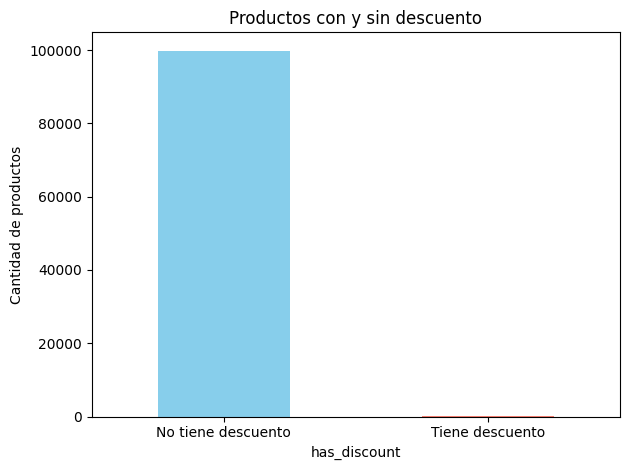

In [65]:
# Contar cuántos productos tienen o no descuento
discount_counts = df['has_discount'].value_counts()

# Crear la gráfica de barras
discount_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Etiquetas y título
plt.xticks([0, 1], ['No tiene descuento', 'Tiene descuento'], rotation=0)
plt.ylabel('Cantidad de productos')
plt.title('Productos con y sin descuento')
plt.tight_layout()
plt.show()

Tiempo de publicación activo:

In [49]:
df['publication_duration'] = (df['stop_time'] - df['start_time']).dt.days
df['publication_duration'] = df['publication_duration'].astype('Int64')  # Convertimos a tipo entero nullable

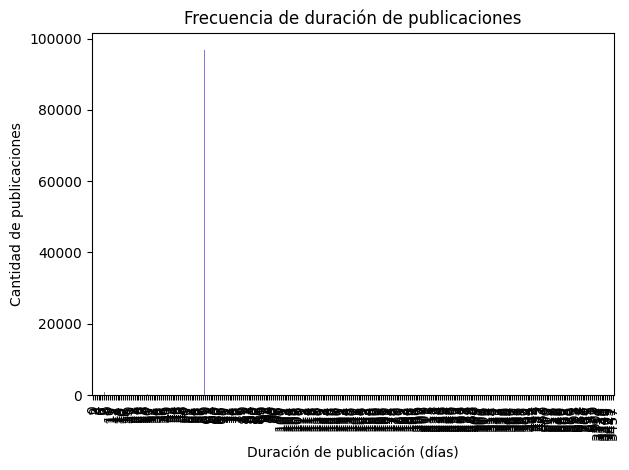

In [66]:
# Contar la frecuencia de cada duración
duration_counts = df['publication_duration'].value_counts().sort_index()

# Crear la gráfica de barras
duration_counts.plot(kind='bar', color='mediumpurple')

# Etiquetas y título
plt.xlabel('Duración de publicación (días)')
plt.ylabel('Cantidad de publicaciones')
plt.title('Frecuencia de duración de publicaciones')
plt.tight_layout()
plt.show()

Ratio de ventas:

In [50]:
df['sell_through_rate'] = df['sold_quantity'] / (df['sold_quantity'] + df['available_quantity'])


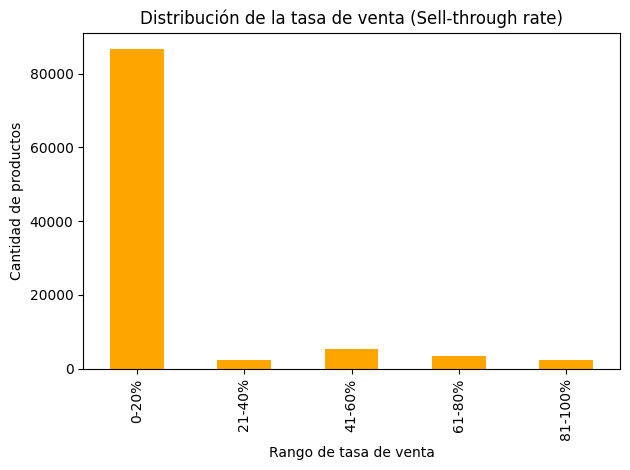

In [67]:
# Definir los rangos de porcentaje (0 a 1)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# Crear columna categórica
df['sell_through_range'] = pd.cut(df['sell_through_rate'], bins=bins, labels=labels, include_lowest=True)

# Contar frecuencias por rango
rate_counts = df['sell_through_range'].value_counts().sort_index()

# Crear gráfica de barras
rate_counts.plot(kind='bar', color='orange')

# Etiquetas y formato
plt.xlabel('Rango de tasa de venta')
plt.ylabel('Cantidad de productos')
plt.title('Distribución de la tasa de venta (Sell-through rate)')
plt.tight_layout()
plt.show()

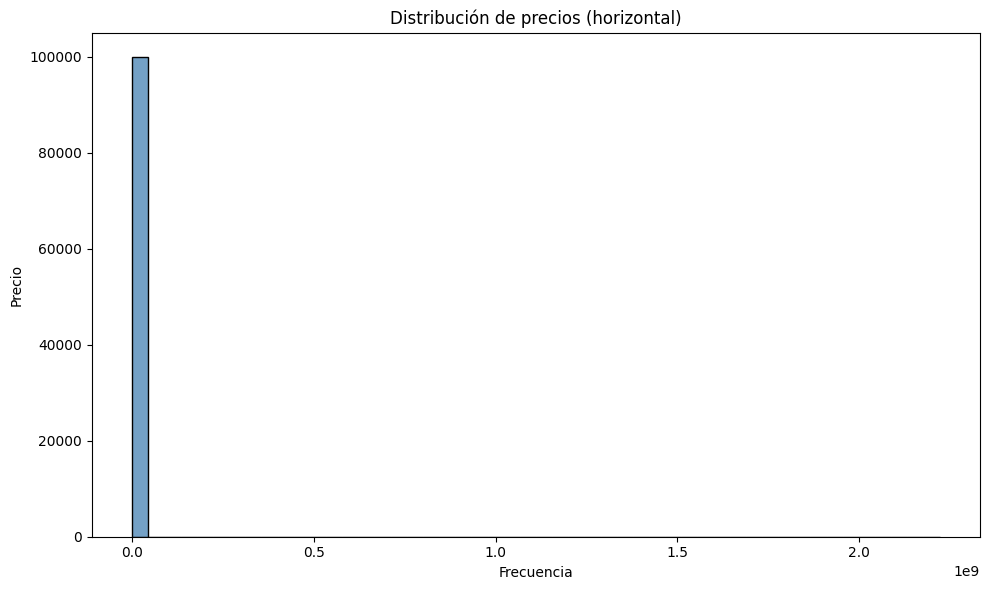

In [ ]:
# Crear figura
plt.figure(figsize=(10, 6))

# Histograma vertical
sns.histplot(df['price'], bins=50, color='steelblue')

# Etiquetas y título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')

plt.tight_layout()
plt.show()


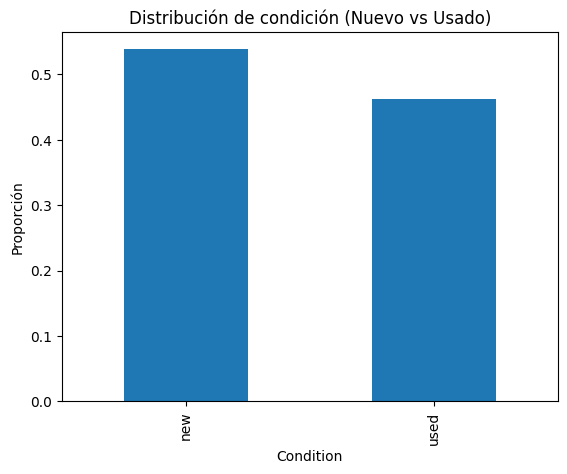

In [52]:
df['condition'].value_counts(normalize=True).plot(kind='bar', title='Distribución de condición (Nuevo vs Usado)')
plt.xlabel('Condition')
plt.ylabel('Proporción')
plt.show()


In [53]:
num_cols = ['price', 'base_price', 'original_price', 'sold_quantity', 'available_quantity', 'initial_quantity']
df[num_cols].describe()


,price,base_price,original_price,sold_quantity,available_quantity,initial_quantity
count,1.000000e+05,1.000000e+05,143.000000,100000.000000,100000.000000,100000.000000
mean,5.252433e+04,5.252423e+04,1593.341958,2.396990,34.842380,35.093370
std,8.623127e+06,8.623127e+06,2245.798072,42.685077,420.808403,421.076196
min,8.400000e-01,8.400000e-01,120.000000,0.000000,1.000000,1.000000
25%,9.000000e+01,9.000000e+01,449.000000,0.000000,1.000000,1.000000
50%,2.500000e+02,2.500000e+02,858.000000,0.000000,1.000000,1.000000
75%,8.000000e+02,8.000000e+02,1500.000000,0.000000,2.000000,2.000000
max,2.222222e+09,2.222222e+09,13999.000000,8676.000000,9999.000000,9999.000000


## 3. Análisis Univariado
Exploramos la distribución de variables categóricas y numéricas.

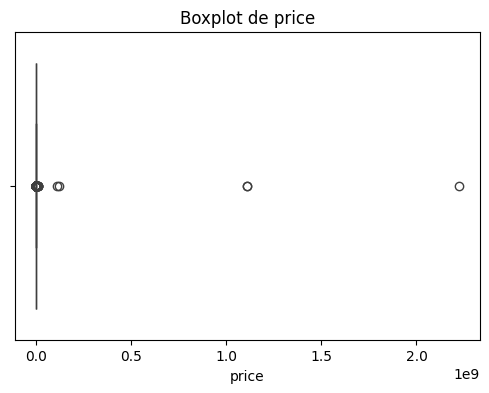

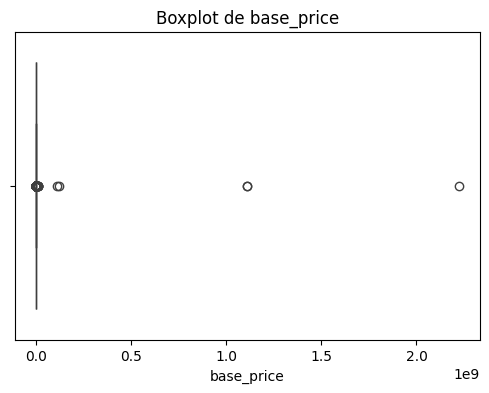

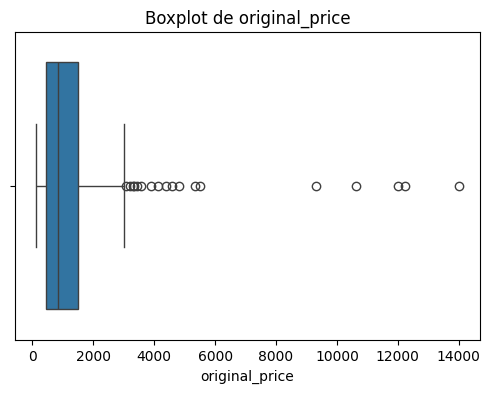

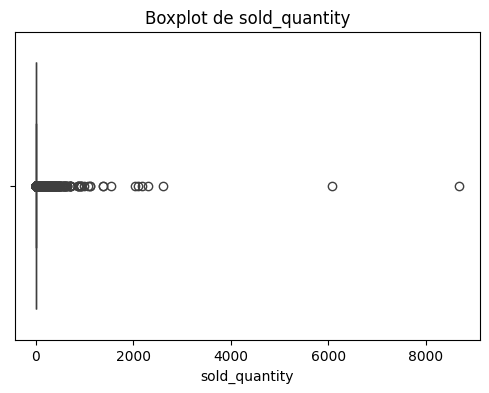

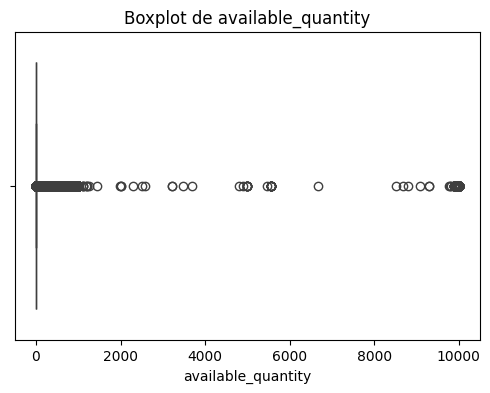

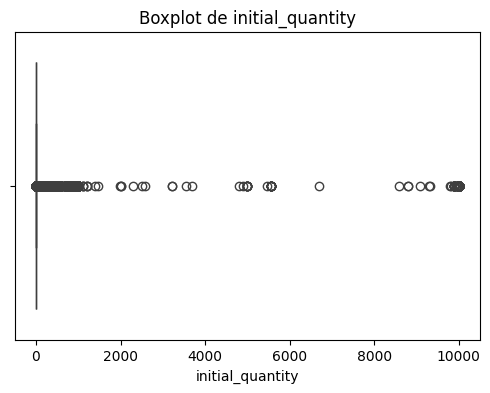

In [54]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


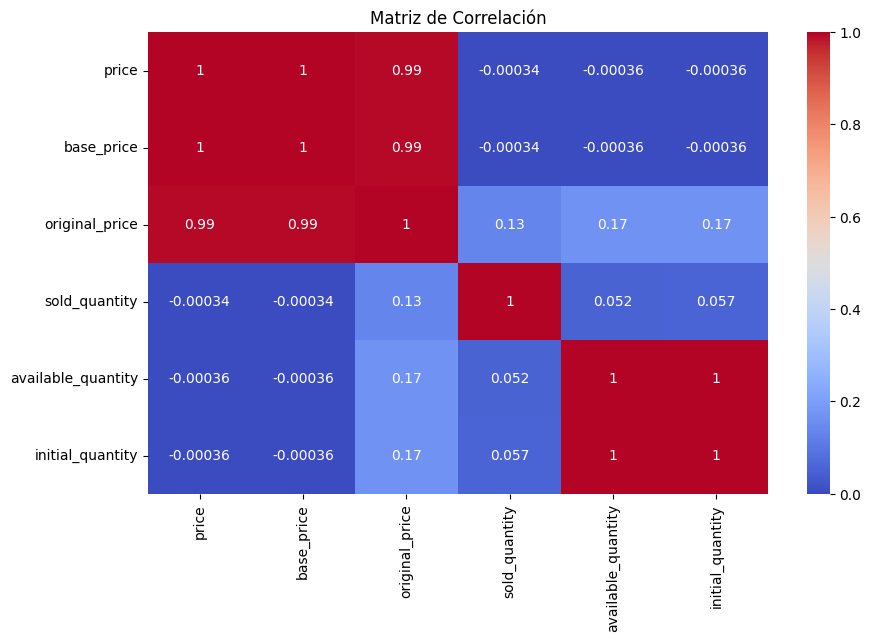

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Métodos de pago y medios de envío

In [80]:
# Verificar las primeras filas de la columna 'shipping'
print(df['shipping'].head())


0    {'local_pick_up': True, 'methods': [], 'tags':...
1    {'local_pick_up': True, 'methods': [], 'tags':...
2    {'local_pick_up': True, 'methods': [], 'tags':...
3    {'local_pick_up': True, 'methods': [], 'tags':...
4    {'local_pick_up': True, 'methods': [], 'tags':...
Name: shipping, dtype: object


In [81]:
# Extraer la clave 'local_pick_up' de los diccionarios en la columna 'shipping'
df['shipping_local_pick_up'] = df['shipping'].apply(lambda x: x.get('local_pick_up', False) if isinstance(x, dict) else False)

# Verificar los valores únicos en la nueva columna
print(df['shipping_local_pick_up'].unique())


[ True False]


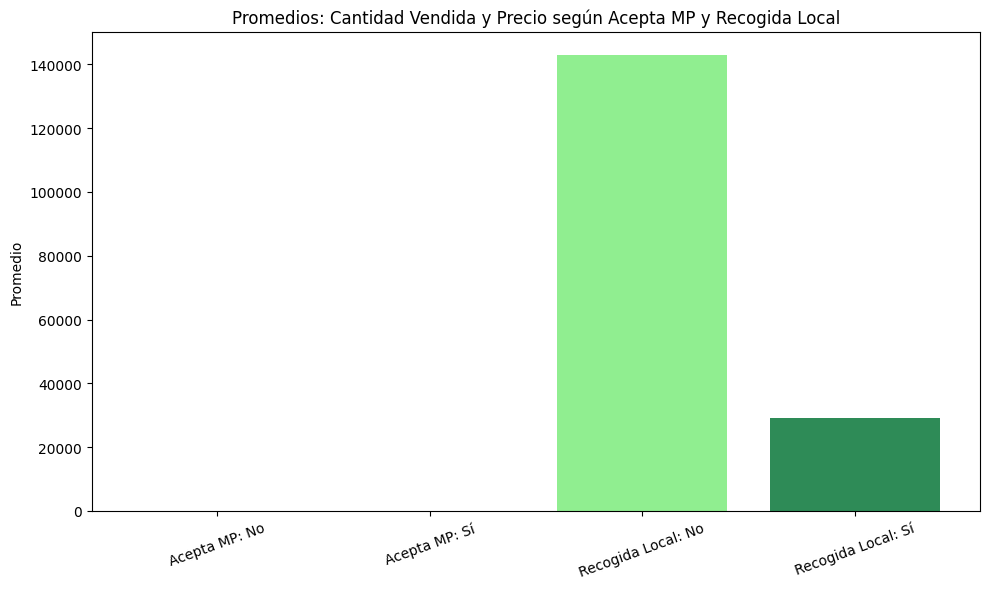

In [82]:
# Calcular los promedios
mercadopago_avg = df.groupby('accepts_mercadopago')['sold_quantity'].mean()
shipping_avg = df.groupby('shipping_local_pick_up')['price'].mean()

# Unificar resultados en un nuevo DataFrame para graficar
data = {
    'Categoría': ['Acepta MP: No', 'Acepta MP: Sí', 'Recogida Local: No', 'Recogida Local: Sí'],
    'Promedio': [
        mercadopago_avg.get(False, 0),
        mercadopago_avg.get(True, 0),
        shipping_avg.get(False, 0),  # Ajustar según los valores extraídos
        shipping_avg.get(True, 0)  # Ajustar según los valores extraídos
    ]
}

df_bar = pd.DataFrame(data)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_bar['Categoría'], df_bar['Promedio'], color=['lightblue', 'steelblue', 'lightgreen', 'seagreen'])

# Etiquetas
plt.title('Promedios: Cantidad Vendida y Precio según Acepta MP y Recogida Local')
plt.ylabel('Promedio')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Análisis de vendedores (seller_id, official_store_id)

In [60]:
top_sellers = df['seller_id'].value_counts().head(10)
print(top_sellers)


seller_id
52340590     933
35235505     727
76310627     470
7125093      452
130511705    358
31210885     339
58869788     293
164929499    273
147629117    269
76404673     266
Name: count, dtype: int64


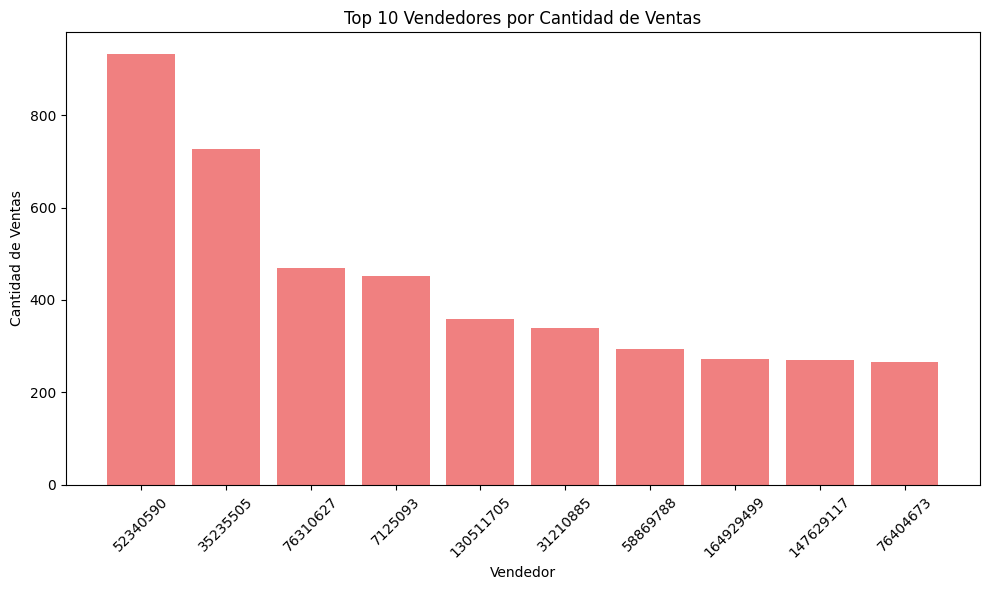

In [83]:
# Crear gráfico de barras para los 10 mejores vendedores
plt.figure(figsize=(10, 6))
bars = plt.bar(top_sellers.index.astype(str), top_sellers.values, color='lightcoral')

# Agregar etiquetas y título
plt.title('Top 10 Vendedores por Cantidad de Ventas')
plt.xlabel('Vendedor')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


¿Los vendedores oficiales tienen más ventas?

In [84]:
df['is_official'] = df['official_store_id'].notnull().astype(int)

# Calcular promedios de cantidad vendida para cada grupo de 'is_official'
avg_sold_quantity = df.groupby('is_official')['sold_quantity'].mean()


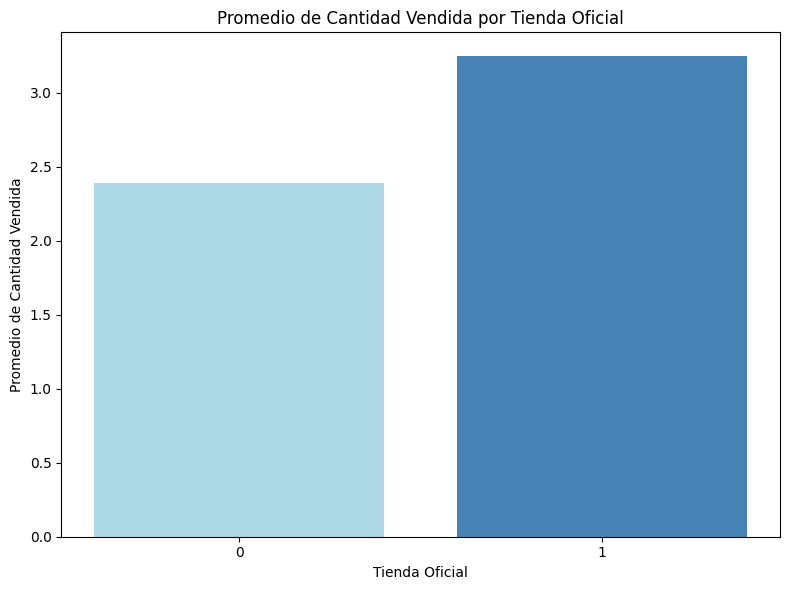

In [85]:
# Crear gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_sold_quantity.index.astype(str), avg_sold_quantity.values, color=['lightblue', 'steelblue'])

# Agregar etiquetas y título
plt.title('Promedio de Cantidad Vendida por Tienda Oficial')
plt.xlabel('Tienda Oficial')
plt.ylabel('Promedio de Cantidad Vendida')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Análisis temporal de ventas


In [86]:
df['date_created'] = pd.to_datetime(df['date_created'])
monthly_sales = df.groupby(df['date_created'].dt.to_period("M"))['sold_quantity'].sum()



C:\Users\Acer\AppData\Local\Temp\ipykernel_23452\1393288636.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = df.groupby(df['date_created'].dt.to_period("M"))['sold_quantity'].sum()


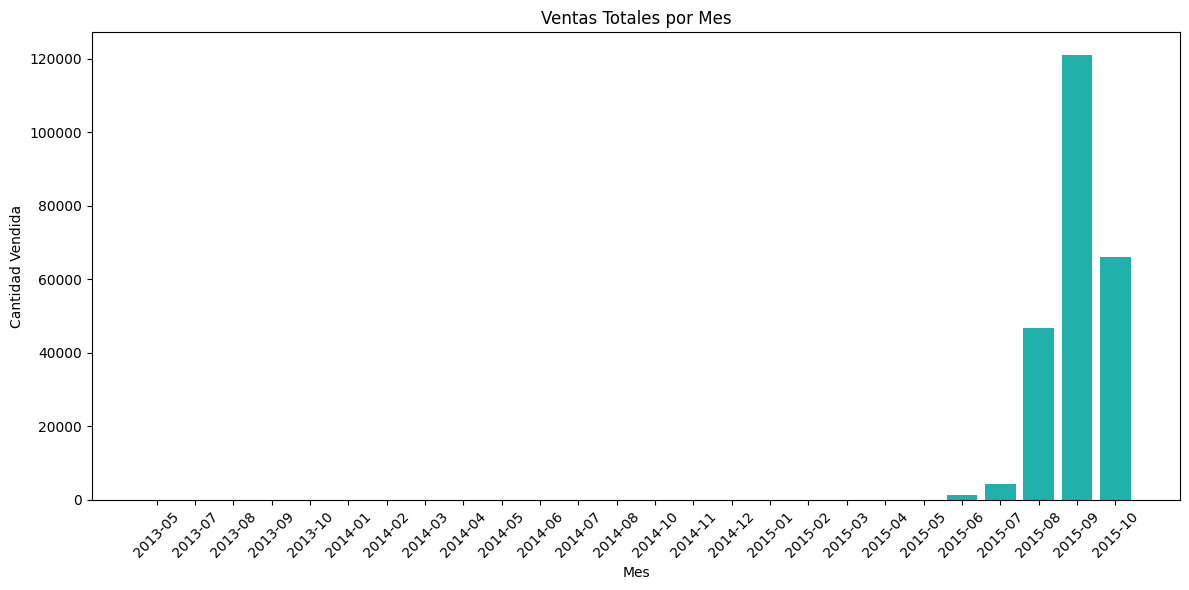

In [87]:
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales.index.astype(str), monthly_sales.values, color='lightseagreen')

# Agregar etiquetas y título
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [89]:
# Guardar el DataFrame en un archivo CSV en la ruta especificada
ruta = r'C:\Users\Acer\OneDrive\Escritorio\ejercicio_ML\datos\dataset_mercadolibre_limpio.csv'
df.to_csv(ruta, index=False)
print(f"El dataset se ha guardado como '{ruta}'")

El dataset se ha guardado como 'C:\Users\Acer\OneDrive\Escritorio\ejercicio_ML\datos\dataset_mercadolibre_limpio.csv'
